# Virtual Pruning

## Importing the digitized structure

In [1]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()
#g = extend_mtg_with_organs(g)

In [2]:
simplification = False

if simplification:
    import simplif ; reload(simplif)
    from simplif import simplify_mtg
    sg = simplify_mtg(g,11083)
    g = sg

In [2]:
from matplotlib.pyplot import *
import mtgplot as mp

In [4]:
#initrepr = mp.representation(g, wood = True, leaves=True, gc=False)
#initrepr.save('initialtree.bgeom')
sw = mp.plot_tree(g, leaves=True)
sw

SceneWidget(scenes=[{'id': 'ynoUVwovtb4DPqo64Cao1VMed', 'data': b'x\xda\xcc\xbd\x07X\x14I\xbb\xf7\x8d(\x06\xcc…


# Pruning

In [3]:
import pruning ; reload(pruning)
from pruning import *

In [4]:
prunedmtg = prune(g, 180)

In [5]:
intensity = continuous_intensity_from_pruned(prunedmtg)
print(intensity, intensity_level(intensity))

0.575409156063304 T3


In [6]:
prunedrepr = mp.representation(prunedmtg, wood = False, leaves=True)

# Mortality post pruning

In [10]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [14]:
Zeta_min = light_variables_mortality(prunedrepr)

<AxesSubplot:>

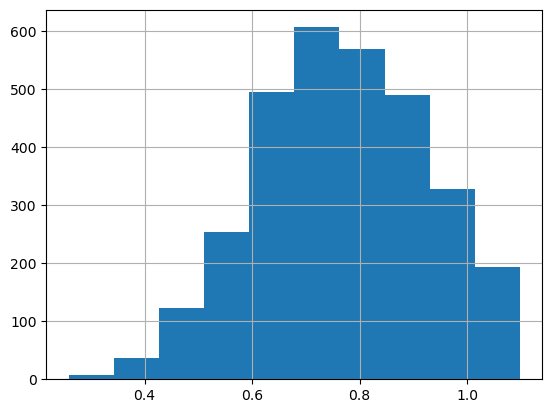

In [41]:
Zeta_min.hist()

In [42]:
#mp.plot_projection(prunedrepr, Zeta_min)

In [15]:
import mortality ; reload(mortality)
from mortality import gu_mortalities_post_pruning

In [16]:
postpruningmtg, removed = gu_mortalities_post_pruning(prunedmtg, Zeta_min, intensity)

Should examine 2456  GUs.


# Regrowth

In [17]:
postpruningrepr = mp.representation(postpruningmtg, wood = False, leaves=True)

In [18]:
TrPPFD_mean, TrPPFD_min, Zeta_mean, Zeta_8H = light_variables_regrowth(postpruningrepr)

In [19]:
import regrowth_base; reload(regrowth_base)
from regrowth_base import plot_growth
import regrowth; reload(regrowth)
from regrowth import *

In [20]:
regrowth, newids = growth(postpruningmtg, TrPPFD_mean, TrPPFD_min, Zeta_mean, Zeta_8H, intensity)
print('Created', len(newids), 'new GUs')


Should examine 2269 terminal GUs.
Processed 318 pruned terminal GU and 1907 unpruned terminal GU and  44 ignored.
Created 3876 new GUs


In [49]:
#plot_growth(regrowth, leaves=True, gc=True)

In [21]:
def date_histo(g):
    from matplotlib.pyplot import hist, show
    from collections import Counter
    from datetime import timedelta
    c = list(Counter(g.property('BurstDate').values()).items())
    c.sort(key = lambda v : v[0])
    mindate = c[0][0]
    maxdate = c[-1][0]
    c = dict(c)
    r = range(0,(maxdate-mindate).days)
    d = [mindate+timedelta(days=d) for d in r]
    v = [ c.get(di,0) for di in d]
    bar(r,v)
    xticks(r,d, rotation=90)
    show()

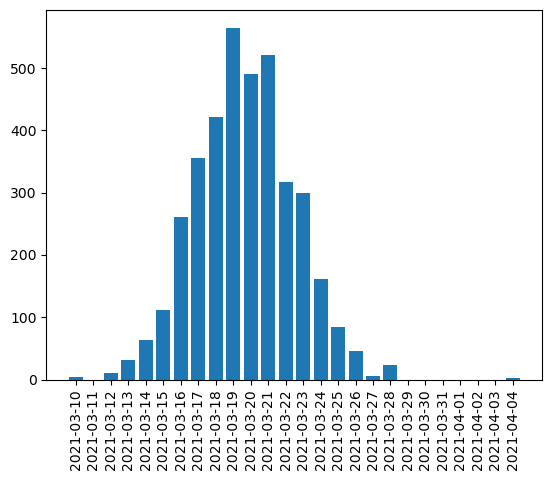

In [22]:
date_histo(regrowth)

In [52]:
#plot_growth_dynamic(regrowth)

In [53]:
def nb_children_histo(g):
    def severity(vid):
        return g.property('pruned').get(vid,0)

    ancestors = [get_parent(g,vid) if vid in g.property('BurstDate') else vid for vid in get_all_terminal_gus(g) ]
    ancestors = set(ancestors)
    
    values = [[] for i in range(4)]
    for vid in ancestors:
        values[severity(vid)].append(g.nb_children(vid))
    figure(figsize=(18,4))
    for order, v in enumerate(values):
        if len(v) > 0:
            subplot(220+order+1)
            hist(v, bins=np.arange(0,max(1,max(v)))-0.5)
            print(len(v),(np.mean(v), np.std(v)),(np.mean([vi for vi in v if vi > 0]), np.std([vi for vi in v if vi > 0])),(np.min(v), np.max(v)))
    show()
    

1926 (1.3769470404984423, 1.6723169718413071) (2.439742410303588, 1.5369724741417603) (0, 10)
117 (3.5641025641025643, 2.5365182927212775) (4.298969072164948, 2.145073225643676) (0, 10)
94 (3.148936170212766, 2.709154876499668) (4.2898550724637685, 2.259289674669557) (0, 11)
94 (3.404255319148936, 2.663061543764237) (4.266666666666667, 2.282299035816492) (0, 9)


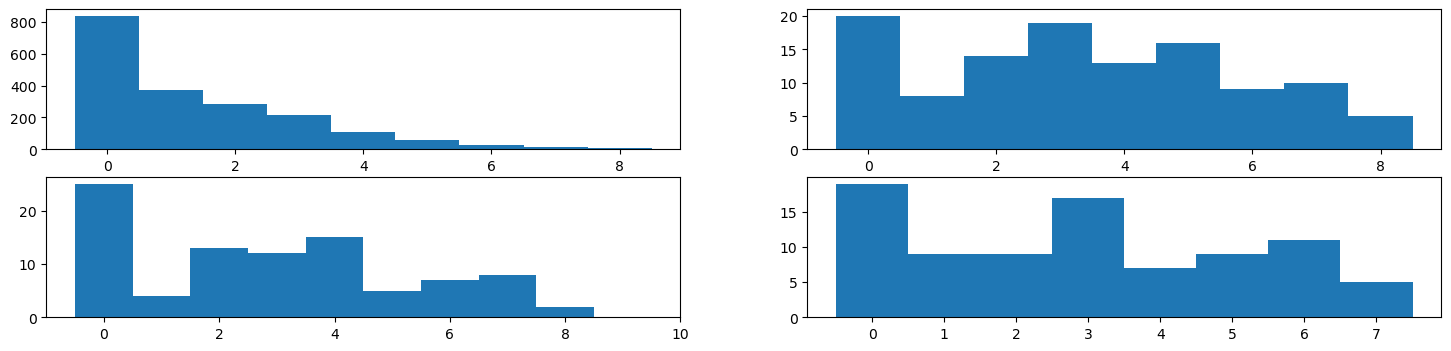

In [54]:
nb_children_histo(regrowth)

Les **longueurs d'UCs générées** suivent la loi normale du modèle précédent. A corriger avec données 2017

## Gap fraction

In [23]:
import gapfraction ; reload(gapfraction)
from gapfraction import gapfraction_dynamic, gap_fraction, pgl_gapfraction_dynamic

In [24]:
gft = pgl_gapfraction_dynamic(regrowth)

/Users/fboudon/Develop/oagit/virtualpruning/notebooks/mtgplot.py:256: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if burstdate and burstdate > todate: return


[(None, 0.27418468959698156), (datetime.date(2021, 3, 10), 0.27416876945242663), (datetime.date(2021, 3, 12), 0.2737548456939989), (datetime.date(2021, 3, 13), 0.2723697931177215), (datetime.date(2021, 3, 14), 0.2680554339433402), (datetime.date(2021, 3, 15), 0.25890931089654295), (datetime.date(2021, 3, 16), 0.24544086860308692), (datetime.date(2021, 3, 17), 0.2297674862887755), (datetime.date(2021, 3, 18), 0.21342545790315776), (datetime.date(2021, 3, 19), 0.18784974567569074), (datetime.date(2021, 3, 20), 0.17190572090394582), (datetime.date(2021, 3, 21), 0.15560349287971534), (datetime.date(2021, 3, 22), 0.14613100686954236), (datetime.date(2021, 3, 23), 0.14253305420013213), (datetime.date(2021, 3, 24), 0.13775701083365838), (datetime.date(2021, 3, 25), 0.1367301615098665), (datetime.date(2021, 3, 26), 0.13536898915042148), (datetime.date(2021, 3, 27), 0.13535306900586658), (datetime.date(2021, 3, 28), 0.13466054271772787), (datetime.date(2021, 4, 4), 0.13446154091079146), (dateti

In [25]:
gft = gft[1:]

In [26]:
pruningdate = date(2021,2,24)
gf0 = gap_fraction(g)

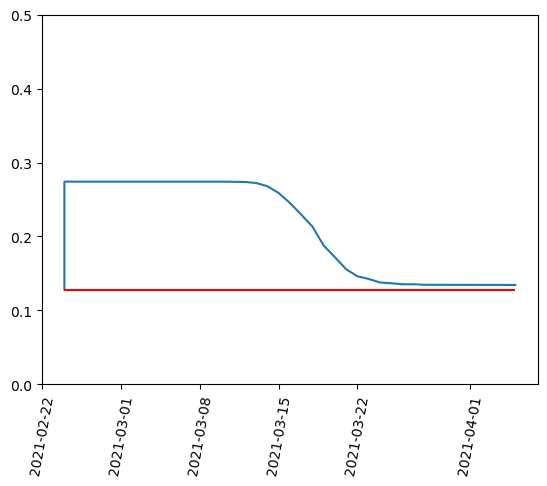

In [29]:
from matplotlib.pyplot import *
plot([pruningdate,pruningdate]+[d for d,g in gft],[gf0,gft[0][1]]+[g for d,g in gft])
hlines(gf0,pruningdate,gft[-1][0],color='r')
ylim(0,0.5)
xticks(rotation = 80)
show()

# leaf area produced at the tree scale vs. leaf area removed by pruning

In [99]:
def leaf_area_produced(mtg,newids):
    newids = growth(t3, listidprunedT3, T3)
    totalleafarea = sum([individual_leafarea_unpruned() for vid in newids])
    growth(t3, listidprunedT3, T3)
    return totalleafarea

# améliorations possibles du modèle

In [60]:
def simulation(mtg, nbcuts, gumortality = True):
    from allometry import gu_leaf_area
    # characterize before pruning
    # nb of terminal units
    nbterminalunits = len(get_all_terminal_gus(mtg))

    # determine pruning
    listidpruned = define_pruning(mtg, nbcuts, None)
    #pruningprop = tag_pruning(mtg, listidpruned)

    # characterize pruning
    # - intensity
    intensity = continuous_intensity(g,listidpruned)
    ilevel = intensity_level(intensity)
    if intensity == T2:
        raise ValueError('Intensity', ilevel, intensity)
        
    #  - nb of terminal units
    nbremovedGU = sum([sum([len(get_descendants_gus_from_ancestor(mtg, vid))-1 for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # - surface foliaire retire 
    removed_leaf_area = sum([sum([gu_leaf_area(get_gu_diameter(mtg, vid)) for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # apply pruning
    prunedmtg = apply_pruning(mtg, listidpruned)
    
    if gumortality:
        prunedrepr = mp.representation(prunedmtg, wood = False, leaves=True)
        Zeta_min = light_variables_mortality(prunedrepr)
    
        postpruningmtg, removed = gu_mortalities_post_pruning(prunedmtg, Zeta_min, intensity)
        postpruningrepr = mp.representation(postpruningmtg, wood = False, leaves=True)
    else:
        postpruningmtg = prunedmtg
        postpruningrepr = mp.representation(postpruningmtg, wood = False, leaves=True)
        
    
    TrPPFD_mean, TrPPFD_min, Zeta_mean, Zeta_8H = light_variables_regrowth(postpruningrepr)

    
    # apply growth    
    growthmtg, newGUs = growth(postpruningmtg, TrPPFD_mean, TrPPFD_min, Zeta_mean, Zeta_8H, intensity, mortalityenabled=gumortality)


    # characterize pruning
    # nb of terminal units

    allpruned = set(listidpruned.keys())

    # characterize growth
    nbgeneratedGU = len(newGUs)
    generated_leaf_area_pruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if vid in allpruned])
    generated_leaf_area_unpruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if not (vid in allpruned)])
    
    return (nbterminalunits, nbremovedGU, nbgeneratedGU), (removed_leaf_area, generated_leaf_area_pruned, generated_leaf_area_unpruned)
    

In [61]:
units0, la0 = simulation(g, 0)
print(units0, la0)

Should examine 3228  GUs.
Should examine 3164 terminal GUs.
Processed 0 pruned terminal GU and 3124 unpruned terminal GU and  40 ignored.
(3228, 0, 213) (0, 0, 470.8346948752503)


In [62]:
units20, la20 = simulation(g, 15)
print(units20, la20)

Should examine 3164  GUs.
Should examine 3101 terminal GUs.
Processed 35 pruned terminal GU and 3028 unpruned terminal GU and  38 ignored.
(3228, 168, 322) (460.3422957888761, 0, 746.7597143782373)


In [63]:
units60, la60 = simulation(g, 60)
print(units60, la60)

Should examine 2988  GUs.
Should examine 2914 terminal GUs.
Processed 134 pruned terminal GU and 2738 unpruned terminal GU and  42 ignored.
(3228, 664, 752) (1879.7117683569259, 0, 1630.335020955322)


In [64]:
#units0060, la0060 = pipeline(g, (0,30,76))
#print(units0060, la0060)

In [65]:
print(la0[1]-la0[0])
print(la20[1]-la20[0])
print(la60[1]-la60[0])


0
-460.3422957888761
-1879.7117683569259


In [66]:
def process_range(mtg, cutrange = (0,20), cuttype = (1,1,1), nbtests = 1):
    if type(cutrange) == int:
        cutrange = (0, cutrange)
    import numpy as np
    gla = []
    gunits = [] 
    cuts = []
    for c in range(*cutrange):
        for i in range(nbtests):
            print('process',c,'-',i)
            try:
                units, la = simulation(mtg, [c*i for i in cuttype])
            except ValueError as e:
                print(e)
                continue
            gla.append(la)
            gunits.append(units)
            cuts.append(c)
    gla = np.array(gla)
    gunits = np.array(gunits)
    return cuts, gla, gunits
    

In [67]:
cuts76, las76, units76 = process_range(g,(0,180,5), nbtests = 1)


process 0 - 0
Should examine 3228  GUs.
Should examine 3174 terminal GUs.
Processed 0 pruned terminal GU and 3134 unpruned terminal GU and  40 ignored.
process 5 - 0
Should examine 3216  GUs.
Should examine 3165 terminal GUs.
Processed 13 pruned terminal GU and 3112 unpruned terminal GU and  40 ignored.
process 10 - 0
Should examine 3175  GUs.
Should examine 3124 terminal GUs.
Processed 23 pruned terminal GU and 3059 unpruned terminal GU and  42 ignored.
process 15 - 0
Should examine 3182  GUs.
Should examine 3128 terminal GUs.
Processed 31 pruned terminal GU and 3056 unpruned terminal GU and  41 ignored.
process 20 - 0
Should examine 3133  GUs.
Should examine 3087 terminal GUs.
Processed 43 pruned terminal GU and 3003 unpruned terminal GU and  41 ignored.
process 25 - 0
Should examine 3094  GUs.
Should examine 3032 terminal GUs.
0.09377509473320292 3.2 nan
lam < 0 or lam is NaN
process 30 - 0
Should examine 3098  GUs.
Should examine 3041 terminal GUs.
Processed 67 pruned terminal GU a

KeyError: 'T2'

In [ ]:
def plot_cutrange(cuts, las, units):
    figure(figsize=(12,6))
    #subplot(121)
    normalproduction = np.mean(las[np.where(np.isin(cuts,[0]))[0],2])
    plot(cuts,las[:,0],'.',label='removed leaf area')
    plot(cuts,las[:,1],'.',label='generated leaf area from pruned GU')
    plot(cuts,las[:,2],'.',label='generated leaf area from unpruned GU')
    plot(cuts,las[:,1]+las[:,2],'.',label='generated leaf area')
    plot(cuts,(las[:,1]+las[:,2])-(las[:,0]+normalproduction),'.',label='increase of leaf area (compared to To)')
    legend()
    show()
    figure(figsize=(12,6))
    #subplot(122)
    plot(cuts,units[:,0],'.',label='nb terminal units')
    plot(cuts,units[:,1],'.',label='nb removed GU')
    plot(cuts,units[:,2],'.',label='nb generated GU')
    legend()
    show()


In [ ]:
plot_cutrange(cuts76, las76, units76)


In [ ]:

cuts, las, units = process_range(g,(0,300,5), cuttype = (1,0,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,300,5), cuttype = (0,1,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,80,2), cuttype = (0,0,1), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)